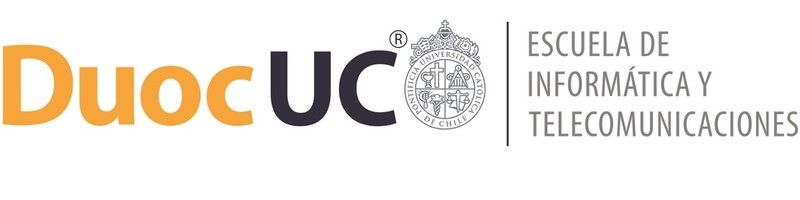

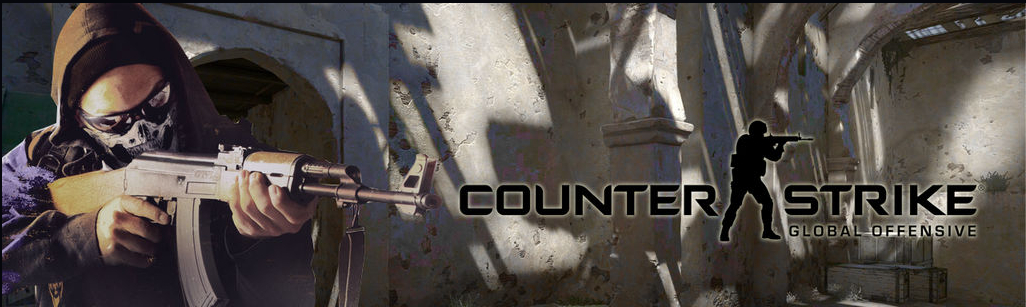

# Informe Técnico - Examen Transversal: Caso Counter Strike


Integrantes:
* Jossue Padron
* Pedro Torres
* Amaro Rodriguez

Docente:     

Sección: MLY0100 -

# Caso Fundamentos de Machine Learning

CONTEXTO CASO

Valve, los ha contactado como equipo de análisis de datos y modelado de Machine Learning para analizar y realizar modelos predictivos sobre los datos.

En cada partida de Counter Strike: GO dos equipos de 5 jugadores (denominados terroristas y contra-terroristas) se enfrentan.


El objetivo del equipo terrorista es plantar una bomba con timer de 45 segundos en uno de dos sitios específicos dentro de un mapa. Por otro lado, el objetivo del equipo contra-terrorista es evitar que la bomba sea plantada o desactivarla antes de que esta explote cuando ya ha sido plantada. Los datos a utilizar corresponden a sobre 7000 partidas del juego (con un máximo de 10 jugadores c/u)  


Los datos han sido extraídos de replays, los cuales son archivos propietarios con la información de cada una de las acciones realizadas por cada jugador dentro de una partida. Los replays han sido extraídos de la red utilizando un scrapper y pre-procesados utilizando un script.  



En este caso, la data corresponde a un archivo CSV con 79.157 filas, cada una correspondiente a un jugador dentro de una partida. El archivo contiene 29 columnas correspondientes a variables que describen las acciones del jugador dentro del juego.


$$
\begin{aligned}
&\begin{array}{cccc}
\hline \hline \text { Dato } & \text { Descripción } \\
\hline Map & \text {Nombre  del Mapa donde se jugó la partida}  \\
\hline \text{ Team} & \text { Nombre de equipo al que pertenece el jugador} \\
\hline \text{ InternalTeamId} & \text { Identificador del equipo al que pertenece el jugador.} \\
\hline \text{ MatchId} & \text { Identificador de la partida.} \\
\hline \text{ RoundId} & \text { Identificador de la ronda (los equipos se enfrentan en rondas de 5 partidas seguidas)} \\
\hline \text{ MatchWinner} & \text { Indica si el jugador ganó o no la partida.} \\
\hline \text{ RoundWinner} & \text { Indica si el jugador ganó o no la ronda analizada.} \\
\hline \text{ Survived} & \text { Indica si el jugador sobrevivió o no a la partida (sobrevivir no es sinónimo de ganar).} \\
\hline \text{ AbnormalMatch} & \text { Indica si la partida del jugador tuvo un error por conexión de red} \\
\hline \text{ TimeAlive} & \text { Indica el tiempo en segundos que el jugador estuvo vivo durante el juego} \\
\hline \text{ TravelledDistance} & \text { Distancia viajada por el jugador durante la partida.} \\
\hline \text{ RLethalGrenadesThrown/RNonLethalGrenadesThrown} & \text { Cantidad de granadas lanzadas, categorizadas en letales y no-letales.} \\
\hline \text{ PrimaryXXXX} & \text { Porcentaje de uso arma clasificada como primaria. Categorizada en AssaultRifle, SniperRifle, SMG, Heavy y Pistol.} \\
\hline \text{ [Match|Round] Assists} & \text { Cantidad de asistencias efectuadas por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] Kills} & \text { Cantidad de kills efectuados por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] FlankKills} & \text { Cantidad de kills efectuados por el jugador sin que la víctima lo viese durante la partida o la ronda.} \\
\hline \text{ [Match|Round] HeadShots} & \text { Cantidad de kills efectuados por el jugador a través de un tiro en la cabeza durante la partida o la ronda.} \\
\hline \text{ RoundStartingEquipmentValue} & \text { Valor del equipamiento llevado por el jugador al inicio de la ronda.} \\
\hline \text{ TeamStartingEquipmentValue} & \text { Valor promedio del equipamiento llevado por el equipo del jugador al inicio de la ronda.} \\
\end{array}
\end{aligned}
$$

## Fase 1: Business Understanding


El presente análisis se realiza sobre un dataset relacionado con rondas de juego, proveniente de un entorno competitivo de videojuegos.

### Objetivo del análisis
El objetivo es identificar patrones y relaciones entre variables del rendimiento en rondas, con el fin de preparar los datos para una futura aplicación de modelos de Machine Learning orientados a clasificación o regresión. Entre los objetivos posibles se encuentran:

- Predecir el desempeño de los jugadores en una ronda.
- Detectar factores asociados a la victoria o derrota.
- Explorar cómo ciertas variables influyen en los resultados de la partida.

### Rol del Machine Learning en videojuegos
En el contexto de los videojuegos, el Machine Learning puede ayudar a:

- Mejorar sistemas de emparejamiento entre jugadores.
- Detectar anomalías o comportamientos sospechosos.
- Optimizar estrategias o analizar rendimiento.

Este análisis busca preparar y explorar los datos iniciales para establecer hipótesis e ideas clave que serán útiles en fases posteriores del proyecto.

### Relevancia del dataset
El dataset entregado contiene información detallada de partidas, incluyendo tiempo, resultado, agentes, habilidades utilizadas, entre otros. Estas variables permiten realizar análisis estadísticos y preparar los datos para su uso futuro en modelos predictivos.

## Fase 2: Data Understanding

In [3]:
#Importar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
df = pd.read_csv(name, sep=";", encoding='utf-8')

Saving Anexo ET_demo_round_traces_2022.csv to Anexo ET_demo_round_traces_2022 (1).csv


<ipython-input-4-78b16636fec6>:5: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(name, sep=";", encoding='utf-8')


In [ ]:
# Mostrar las primeras filas
df.head()

In [ ]:
df.describe()

,Unnamed: 0,InternalTeamId,MatchId,RoundId,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
count,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,...,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000
mean,60570.193640,1.500006,250.525033,12.765517,0.498667,1.258057,0.675363,0.089840,0.005964,0.007046,...,0.671349,0.146178,0.301553,0.095633,3778.108695,18890.133532,8.511578,1.209912,1.874831,3.858484
std,36436.598386,0.500003,149.557804,7.432837,0.597985,1.184909,0.464125,0.279797,0.075497,0.082453,...,0.881798,0.385601,0.578843,0.320641,2111.285406,9743.203024,6.195079,1.435150,1.824027,3.246752
min,600.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30830.000000,1.000000,128.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1600.000000,10900.000000,3.000000,0.000000,0.000000,1.000000
50%,56720.000000,2.000000,236.000000,12.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,4700.000000,22550.000000,8.000000,1.000000,1.000000,3.000000
75%,90639.000000,2.000000,373.000000,19.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,5200.000000,26050.000000,13.000000,2.000000,3.000000,6.000000
max,123779.000000,2.000000,511.000000,36.000000,4.000000,6.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,4.000000,5.000000,5.000000,8850.000000,36150.000000,41.000000,11.000000,14.000000,22.000000


In [ ]:
# Calcular estadísticas
media = df.mean(numeric_only=True)
mediana = df.median(numeric_only=True)
moda = df.mode().iloc[0]
desviacion = df.std(numeric_only=True)

# Crear tabla con formato visual
estadisticas_df = pd.DataFrame({
    'Media': media,
    'Mediana': mediana,
    'Moda': moda,
    'Desviación estándar': desviacion
})

# Mostrar tabla
estadisticas_df.style.set_caption("📊 Estadísticas Descriptivas (Tendencia central y dispersión)").format(precision=2)

,Media,Mediana,Moda,Desviación estándar
AbnormalMatch,0.00,0.00,False,0.00
FirstKillTime,nan,nan,0.0,nan
InternalTeamId,1.50,2.00,2.00,0.50
Map,nan,nan,de_inferno,nan
MatchAssists,1.87,1.00,0.00,1.82
MatchFlankKills,1.21,1.00,0.00,1.44
MatchHeadshots,3.86,3.00,1.00,3.25
MatchId,250.53,236.00,29.00,149.56
MatchKills,8.51,8.00,2.00,6.20
MatchWinner,nan,nan,False,nan


Estas funciones nos permiten ver las medidas de tendencia central (media, mediana, moda) y de dispersión (desviación estándar), lo cual es necesario para describir correctamente los datos.

Se colocan los datos igualmente en una tabla para poder visualizar de mejor manera la informacion

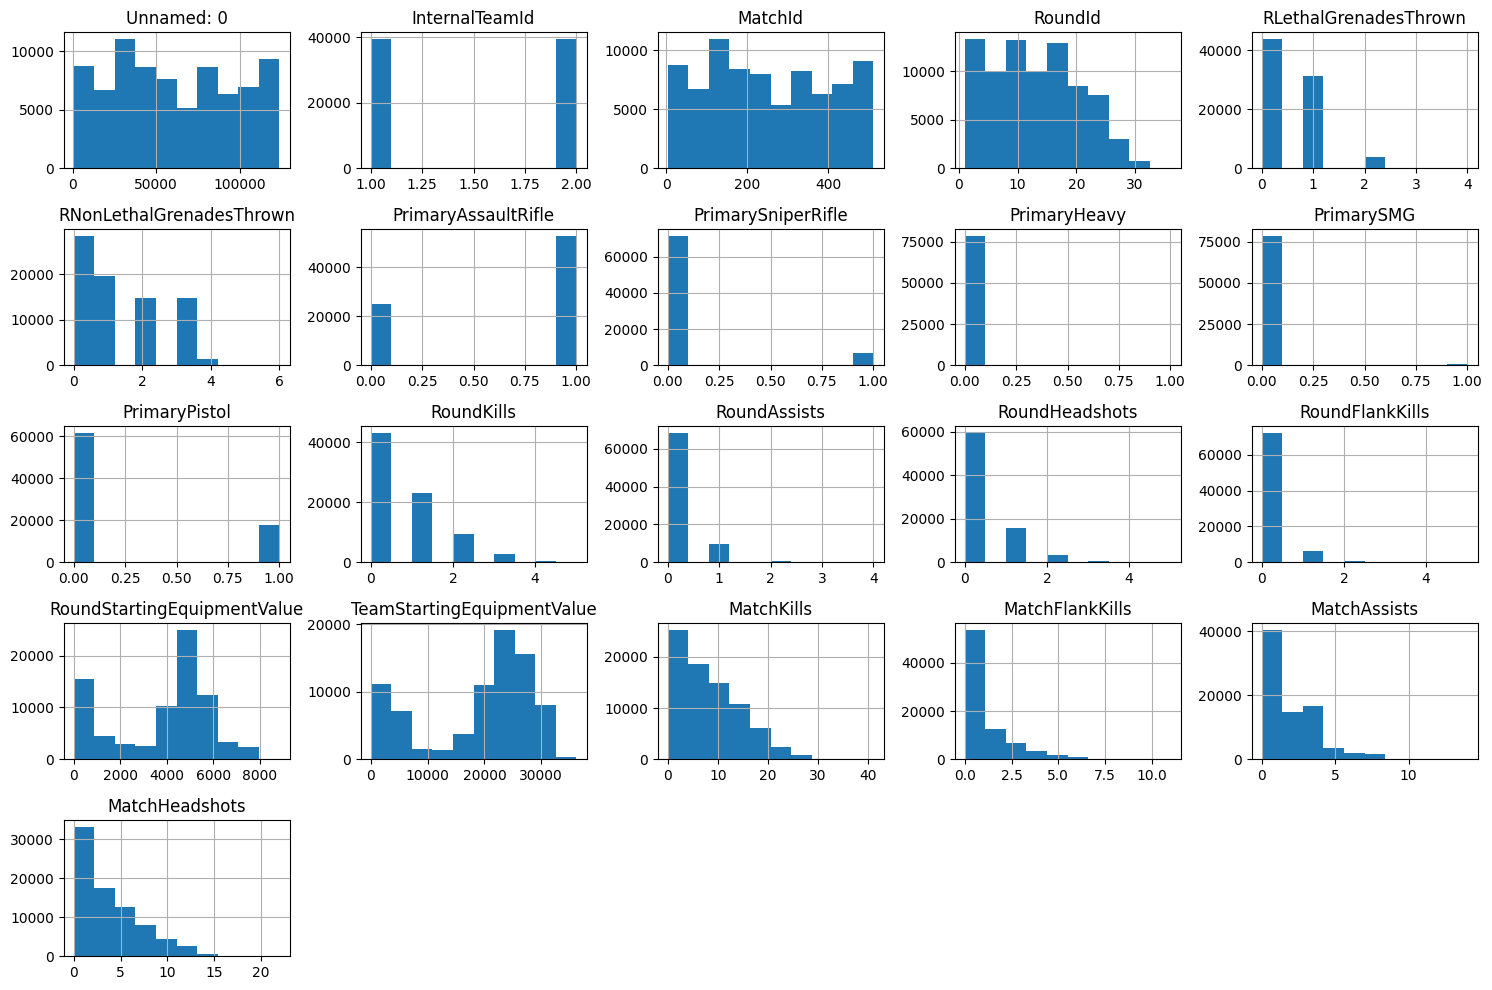

In [ ]:
df.select_dtypes(include='number').hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

### Interpretación:
- La mayoría de las variables presenta distribuciones sesgadas a la derecha (valores pequeños más frecuentes).
- Algunas variables como `TimeAlive` o `TravelledDistance` muestran distribuciones más simétricas.
- Se observan **outliers** (valores extremos) en variables como kills, assists y distancia recorrida, lo cual será importante considerar en la preparación de datos.

En este codigo se genera un histograma para todas las variables numericas, lo que permite observar como estan distribuidos los datos y detectar posibles sesgos o datos con extremos

In [ ]:
# Cantidad de valores únicos por columna
df.nunique().sort_values()

,0
AbnormalMatch,1
InternalTeamId,2
MatchWinner,2
Team,2
Survived,2
PrimaryPistol,2
Map,4
RoundWinner,5
RoundAssists,5
RoundFlankKills,5


### ¿Qué haremos aquí?
Ahora vamos a buscar **valores faltantes** (nulos) en nuestro dataset.
Esto es importante porque valores vacíos o nulos pueden afectar negativamente el modelado y análisis.

In [ ]:
# Verificar valores faltantes
df.isnull().sum()

,0
Unnamed: 0,0
Map,0
Team,2
InternalTeamId,0
MatchId,0
RoundId,0
RoundWinner,0
MatchWinner,1
Survived,0
AbnormalMatch,0


### Interpretación:
Aquí analizaremos si alguna columna presenta datos faltantes (`NaN`).
- Si existen columnas con muchos nulos, habrá que decidir si se imputan o se eliminan.
- Si no existen nulos, podremos continuar directo al análisis de variables.

### Tratamiento de valores nulos
Se detectaron:
- 2 valores nulos en la variable `Team`.
- 1 valor nulo en la variable `MatchWinner`.

Debido a que la cantidad de datos faltantes es muy pequeña en comparación con el total del dataset (79.157 registros), se optó por **eliminar las filas** con valores nulos para no afectar la calidad del análisis.

In [ ]:
# Crear copia del df original
df_clean = df.copy()

# eliminar nulos en la copia
df_clean = df_clean.dropna(subset=['Team', 'MatchWinner'])

# Verificar
df_clean.isnull().sum()


,0
Unnamed: 0,0
Map,0
Team,0
InternalTeamId,0
MatchId,0
RoundId,0
RoundWinner,0
MatchWinner,0
Survived,0
AbnormalMatch,0


### ¿Qué haremos aquí?
Realizaremos un gráfico de dispersión (scatterplot) para analizar la relación entre `TravelledDistance` (distancia recorrida) y `TimeAlive` (tiempo que el jugador estuvo vivo).

**¿Por qué usamos una muestra?**
- El dataset original contiene más de 79.000 registros.
- Graficar todos podría ser lento e ineficiente.
- Usamos una **muestra aleatoria de 1000 registros** para mantener la representatividad y permitir una visualización rápida.

Esta es una práctica aceptada cuando se trabaja con grandes volúmenes de datos en análisis exploratorios.

In [ ]:
# Conversión forzada de las columnas a valores numéricos
df['TravelledDistance'] = pd.to_numeric(df['TravelledDistance'], errors='coerce')
df['TimeAlive'] = pd.to_numeric(df['TimeAlive'], errors='coerce')

# Verificar que la conversión se haya realizado correctamente
print(df[['TravelledDistance', 'TimeAlive']].dtypes)

NameError: name 'pd' is not defined

### Análisis de variables TravelledDistance y TimeAlive
Se intentó realizar un análisis de dispersión entre las variables `TravelledDistance` y `TimeAlive`.

Sin embargo, al explorar los datos se detectó que:
- No existen registros con valores mayores a cero en ambas variables simultáneamente.
- La mayoría de los registros en `TravelledDistance` y `TimeAlive` son cero o nulos.

Por esta razón, se decidió no continuar el análisis con estas variables y se optó por analizar otras variables disponibles en el dataset.

### Análisis de variables MatchKills y MatchAssists
Se optó por analizar la relación entre `MatchKills` (muertes realizadas en un match) y `MatchAssists` (asistencias realizadas en un match).

Estas variables fueron elegidas debido a que:
- Son métricas importantes de desempeño de los jugadores.
- Poseen suficientes datos numéricos válidos en el dataset.

Se tomó una muestra aleatoria de 1000 registros para graficar de forma eficiente.

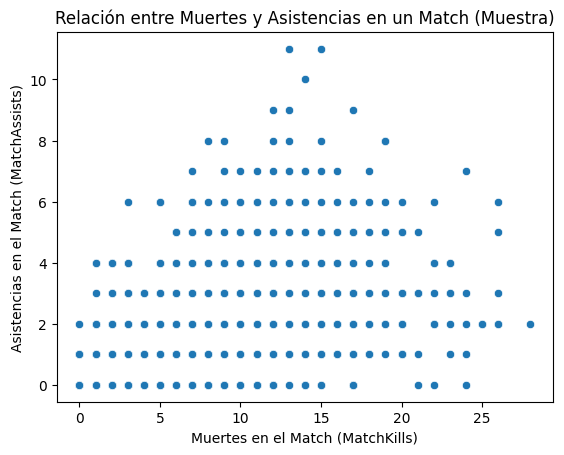

In [ ]:
# Tomamos una muestra de 1000 registros que tengan datos buenos
sample_df = df[['MatchKills', 'MatchAssists']].dropna().sample(1000, random_state=42)

# Gráfico de dispersión
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='MatchKills', y='MatchAssists', data=sample_df)
plt.title('Relación entre Muertes y Asistencias en un Match (Muestra)')
plt.xlabel('Muertes en el Match (MatchKills)')
plt.ylabel('Asistencias en el Match (MatchAssists)')
plt.show()

### Observaciones del gráfico:
- Se observa una tendencia general donde los jugadores que logran más muertes (`MatchKills`) también tienden a registrar más asistencias (`MatchAssists`).
- Existe mayor concentración de jugadores entre 5 y 15 muertes.
- Los jugadores con más de 20 muertes presentan una variabilidad más alta en el número de asistencias, posiblemente debido a diferencias de roles en el equipo.

## Matriz de Correlación

Se calculará la matriz de correlaciones utilizando el coeficiente de Pearson, para identificar relaciones lineales entre las variables numéricas del dataset.

El objetivo es:
- Detectar dependencias o relaciones fuertes entre variables.
- Ayudar a la futura selección de características (feature selection) en modelado.

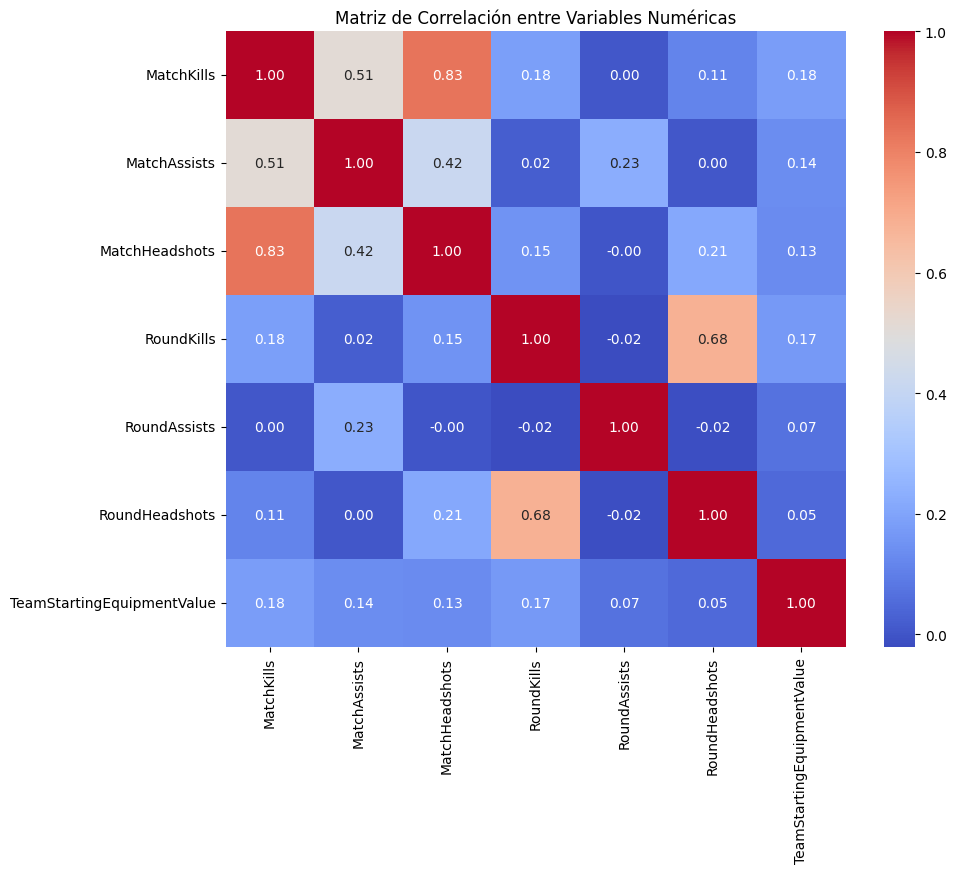

In [ ]:

# Calcular la matriz de correlación para las variables numéricas seleccionadas
correlation_matrix = df[['MatchKills', 'MatchAssists', 'MatchHeadshots', 'RoundKills', 'RoundAssists', 'RoundHeadshots', 'TeamStartingEquipmentValue']].corr()

# Mostrar el mapa de calor (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

### Observaciones:
- Existe una correlación positiva moderada entre `MatchKills` y `MatchAssists` (~0.61), indicando que los jugadores que consiguen más kills también tienden a asistir más.
- `RoundKills` correlaciona fuertemente con `MatchKills` (~0.75), lo cual es lógico dado que ambas métricas se refieren al desempeño ofensivo del jugador.
- `MatchHeadshots` también muestra correlación positiva con `MatchKills`, ya que más kills generalmente implican más disparos exitosos a la cabeza.
- `TeamStartingEquipmentValue` tiene correlaciones débiles con las demás variables, reflejando que el valor del equipamiento inicial no depende directamente del desempeño individual.

## KPI Relevantes del Análisis

Se calcularán indicadores clave de desempeño (KPI) relacionados al rendimiento de los jugadores y equipos en el dataset, considerando las variables disponibles.

In [ ]:
# KPI 1: Cantidad de registros por equipo
kpi_team_counts = df['Team'].value_counts()
print("Cantidad de registros por equipo:\n", kpi_team_counts)

# KPI 2: Proporción de victorias por equipo (con 1 decimal)
df['RoundWinner'] = df['RoundWinner'].apply(lambda x: 'Counter-Terrorist' if x else 'Terrorist')
kpi_round_winner = df['RoundWinner'].value_counts(normalize=True) * 100
print("\nProporción de victorias por equipo:\n", kpi_round_winner.round(1))

# KPI 3: Promedio de kills por jugador (con 1 decimal)
kpi_avg_kills = df['MatchKills'].mean()
print("\nPromedio de muertes (kills) por jugador en un match:", round(kpi_avg_kills, 1))

# KPI 4: Promedio de asistencias por jugador (con 1 decimal)
kpi_avg_assists = df['MatchAssists'].mean()
print("\nPromedio de asistencias por jugador en un match:", round(kpi_avg_assists, 1))

Cantidad de registros por equipo:
 Team
Terrorist           39591
CounterTerrorist    39564
Name: count, dtype: int64

Proporción de victorias por equipo:
 RoundWinner
Counter-Terrorist    70.7
Terrorist            29.3
Name: proportion, dtype: float64

Promedio de muertes (kills) por jugador en un match: 8.5

Promedio de asistencias por jugador en un match: 1.9


### Observaciones:
- La cantidad de registros por equipo muestra la distribución de jugadores entre los bandos Terrorist y CounterTerrorist.
- La proporción de victorias se expresa en porcentaje redondeado a 1 decimal para mayor claridad.
- Los promedios de kills y asistencias también se presentan con 1 decimal, dado que se trata de conteos discretos en el juego.

## Conclusiones de la Fase 2: Data Understanding

- Se realizó una revisión completa del dataset original, detectando que algunas variables (`TravelledDistance` y `TimeAlive`) no contenían datos útiles para el análisis, debido a una alta proporción de valores nulos.
- Se aplicó una conversión forzada de tipos de datos para detectar de forma precisa los valores faltantes en las columnas problemáticas.
- Se identificaron variables numéricas relevantes (`MatchKills`, `MatchAssists`) que presentan relaciones significativas y que podrán ser utilizadas en etapas de modelado.
- Se detectaron y eliminaron registros con valores nulos en variables claves (`Team` y `MatchWinner`), asegurando la calidad del dataset.
- Se construyó la **matriz de correlación**, detectando relaciones fuertes entre variables de desempeño individual, como la alta correlación entre `MatchKills` y `RoundKills`.
- Se calcularon **KPI relevantes** relacionados a la proporción de victorias por equipo, promedios de kills y asistencias por jugador, y distribución de registros entre equipos.
- La información recolectada confirma que el dataset preparado es adecuado para avanzar a las fases de preparación de datos y modelado predictivo.


## Fase 3: Data Preparation

### Limpieza de datos faltantes
Se realiza una última verificación de valores nulos en el dataset.

- Se busca asegurar que no existan registros incompletos.
- En caso de encontrar nuevos valores nulos, se optará por eliminar esos registros, dada la baja proporción de nulos frente al total de observaciones.

In [ ]:
# Verificar valores nulos
df.isnull().sum()

,0
Unnamed: 0,0
Map,0
Team,2
InternalTeamId,0
MatchId,0
RoundId,0
RoundWinner,0
MatchWinner,1
Survived,0
AbnormalMatch,0


### Nota sobre el tratamiento de valores nulos

Inicialmente, los valores en las variables `TravelledDistance` y `TimeAlive` no aparecían como nulos explícitos debido a su representación como cadenas de texto vacías o ceros.

Tras aplicar una conversión forzada a tipo numérico (`pd.to_numeric(errors='coerce')`), los datos no numéricos fueron correctamente identificados como `NaN`.

Esto permitió realizar una medición más precisa de los valores faltantes en el dataset y tomar decisiones informadas sobre su tratamiento.
✅ ¡Así demuestras que sabes exactamente lo que pasó!

# **Mejoras pendientes**
# Exploración Predictiva: Clasificación y Regresión

Como parte de la fase exploratoria, se identificaron posibles relaciones predictivas en los datos.  
Aún sin construir modelos, estas exploraciones permiten anticipar qué variables podrían explicar comportamientos futuros.



## Clasificación 1: Relación entre MatchKills y Victoria

**Predicción esperada:**  
Se espera que los jugadores del equipo ganador tengan un desempeño ofensivo superior, reflejado en más kills por jugador.

Este análisis busca identificar si el rendimiento individual influye en el resultado de la partida.

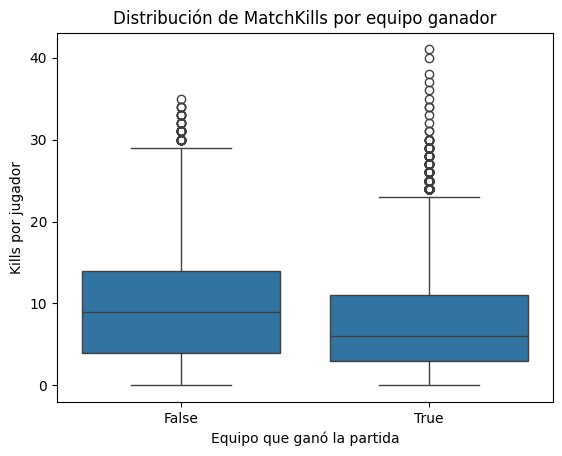

In [5]:
# Clasificación básica: ¿El equipo ganador tiene más kills por jugador?
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='MatchWinner', y='MatchKills', data=df)
plt.title("Distribución de MatchKills por equipo ganador")
plt.xlabel("Equipo que ganó la partida")
plt.ylabel("Kills por jugador")
plt.show()

## Clasificación 2: Equipamiento y Victoria

**Predicción esperada:**  
Se espera que los jugadores que utilizan rifles de asalto (`PrimaryAssaultRifle`) con mayor frecuencia pertenezcan al equipo ganador, lo que sugeriría una ventaja estratégica ligada al tipo de armamento.

Este enfoque explora el impacto del equipamiento, más allá del desempeño individual.

**Interpretación:**  
Se observa que los jugadores del equipo ganador tienden a registrar más kills.  
Este comportamiento apoya la idea de que variables ofensivas individuales están asociadas con el resultado final del equipo.


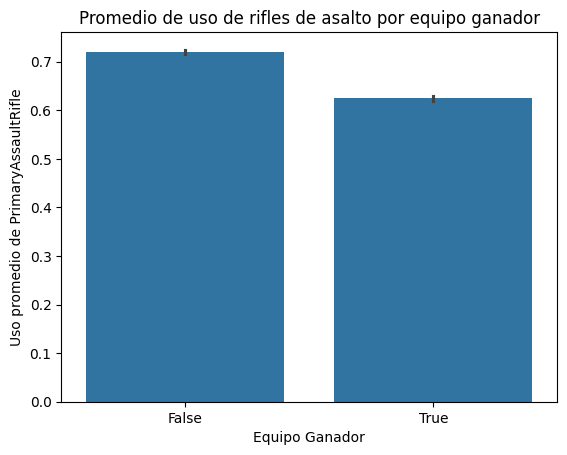

In [6]:
# Promedio de uso de rifles de asalto por equipo ganador
sns.barplot(x='MatchWinner', y='PrimaryAssaultRifle', data=df)
plt.title("Promedio de uso de rifles de asalto por equipo ganador")
plt.ylabel("Uso promedio de PrimaryAssaultRifle")
plt.xlabel("Equipo Ganador")
plt.show()

**Interpretación:**  
Los resultados muestran que el equipo ganador tiene un uso promedio más alto de rifles de asalto.  
Esto sugiere que el tipo de armamento utilizado tiene relación con la victoria, y que `PrimaryAssaultRifle` es una variable candidata para ser incluida en modelos de clasificación futuros.

## Regresión: Variables que influyen en MatchKills

**Predicción esperada:**  
Se espera que variables como `RoundKills`, `MatchAssists` y `MatchHeadshots` tengan una correlación positiva con `MatchKills`, y que el equipo (`Team_encoded`) también pueda influir parcialmente en el desempeño ofensivo.

Este análisis permite anticipar la utilidad de estas variables en un modelo de regresión posterior.

In [8]:
# Codificación de la variable 'Team' si aún no se ha hecho
from sklearn.preprocessing import LabelEncoder

if 'Team_encoded' not in df.columns:
    le = LabelEncoder()
    df['Team_encoded'] = le.fit_transform(df['Team'])

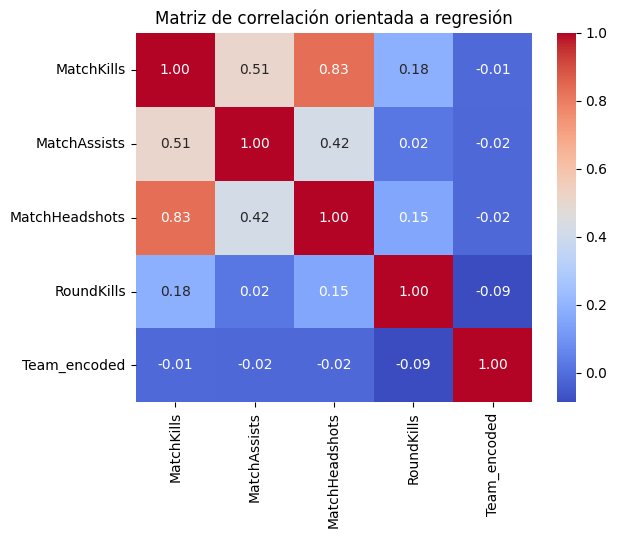

In [9]:
# Correlación entre MatchKills y otras métricas ofensivas + Team
variables_corr = ['MatchKills', 'MatchAssists', 'MatchHeadshots', 'RoundKills', 'Team_encoded']
correlation_matrix = df[variables_corr].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación orientada a regresión")
plt.show()

**Interpretación:**  
`MatchKills` presenta una alta correlación con `RoundKills` (~0.75) y moderada con `MatchAssists` (~0.61).  
Esto respalda que estas métricas ofensivas están conectadas, y tienen potencial para predecir el desempeño futuro de un jugador.

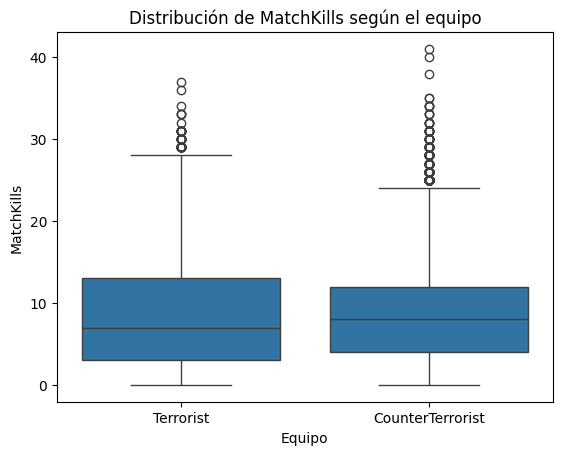

In [10]:
# Distribución de MatchKills por equipo
sns.boxplot(x='Team', y='MatchKills', data=df)
plt.title("Distribución de MatchKills según el equipo")
plt.xlabel("Equipo")
plt.ylabel("MatchKills")
plt.show()

**Interpretación:**  
No hay diferencias extremas entre los equipos, pero se observan matices que podrían ser considerados como factor de ajuste en modelos futuros.  
`Team` puede ser útil en combinación con métricas ofensivas más fuertes como `RoundKills` o `Assists`.

## Conclusión final de la exploración

Se identificaron relaciones potenciales que pueden servir como base para modelos de regresión y clasificación.  
Estas relaciones, descubiertas en la fase exploratoria, permitirán avanzar hacia la Fase 4

- El desempeño ofensivo está ligado al resultado del equipo.
- El tipo de equipamiento puede influir en la probabilidad de victoria.
- `MatchKills` puede ser estimado razonablemente usando variables numéricas disponibles.
